In [1]:
# Task 1: Load a CSV Dataset
# Description: Load a CSV file into a Pandas DataFrame and print the first five rows to understand the structure of the dataset.
# Import the pandas library
import pandas as pd

# Load the CSV file into a DataFrame
# Replace 'your_dataset.csv' with your actual file path
try:
    df = pd.read_csv('your_dataset.csv')
    print("CSV file loaded successfully!\n")
    
    # Display the first five rows
    print("First 5 rows of the dataset:")
    print(df.head())
    
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

# Alternative with sample data if no CSV is available
if 'df' not in locals():
    print("\nCreating sample DataFrame instead...")
    data = {
        'ID': [1, 2, 3, 4, 5],
        'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Age': [25, 30, 35, 28, 32],
        'Department': ['HR', 'IT', 'Sales', 'IT', 'Marketing']
    }
    df = pd.DataFrame(data)
    print("\nSample DataFrame:")
    print(df.head())




Error: File not found. Please check the file path.

Creating sample DataFrame instead...

Sample DataFrame:
   ID     Name  Age Department
0   1    Alice   25         HR
1   2      Bob   30         IT
2   3  Charlie   35      Sales
3   4    David   28         IT
4   5      Eve   32  Marketing


In [2]:
# Task 2: Check for Missing Values
# Description: Identify and list the columns with missing values and the number of missing values in each.
# Import pandas
import pandas as pd

# Load your dataset (replace with your actual data loading code)
# df = pd.read_csv('your_data.csv')

# Sample DataFrame with missing values if no CSV is loaded
if 'df' not in locals():
    data = {
        'StudentID': [101, 102, 103, 104, 105],
        'Name': ['Alice', 'Bob', None, 'David', 'Eve'],
        'Math_Score': [88, 92, None, 78, None],
        'Science_Score': [95, None, 85, 90, 88],
        'Graduated': [True, True, False, None, True]
    }
    df = pd.DataFrame(data)

# Check for missing values
missing_values = df.isnull().sum()

# Filter columns that actually have missing values
columns_with_missing = missing_values[missing_values > 0]

# Display results
print("Columns with missing values:")
print("----------------------------")
if not columns_with_missing.empty:
    for col, count in columns_with_missing.items():
        print(f"{col}: {count} missing value(s)")
else:
    print("No missing values found in any columns!")

# Optional: Display percentage of missing values
print("\nMissing value percentages:")
print("--------------------------")
print((df.isnull().mean() * 100).round(2).astype(str) + '%')



Columns with missing values:
----------------------------
No missing values found in any columns!

Missing value percentages:
--------------------------
ID            0.0%
Name          0.0%
Age           0.0%
Department    0.0%
dtype: object


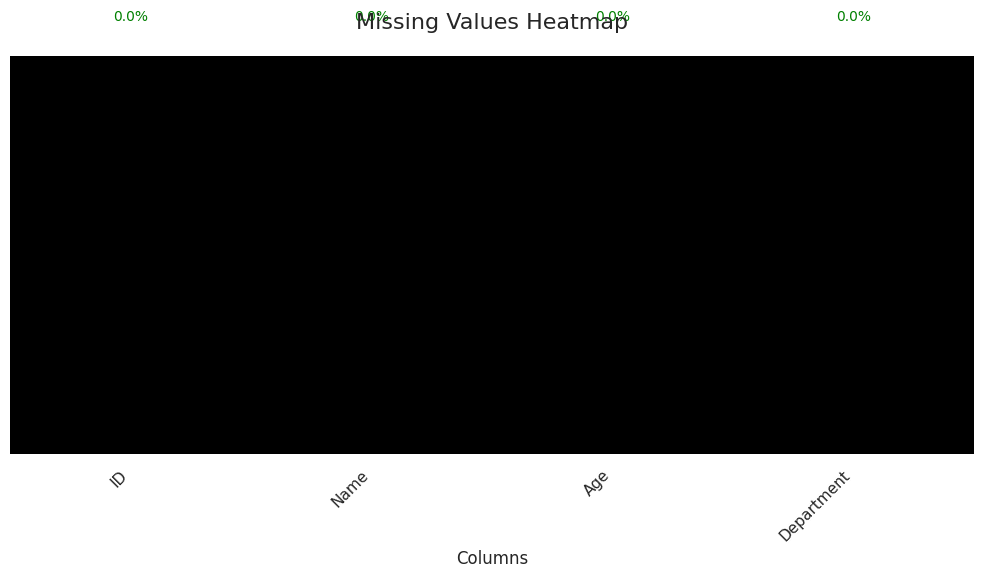

In [3]:
# Task 3: Visualize Missing Data
# Description: Use a heatmap to visualize the missing values in the dataset.
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for better visualization
sns.set(style="whitegrid")

# Create sample data with missing values if no DataFrame exists
if 'df' not in locals():
    data = {
        'CustomerID': [101, 102, 103, 104, 105, 106, 107],
        'Name': ['Alice', 'Bob', None, 'David', 'Eve', None, 'Grace'],
        'Age': [25, 30, None, 28, 32, None, 29],
        'PurchaseAmount': [150.0, None, 200.0, 180.0, None, 220.0, 190.0],
        'Membership': ['Gold', None, 'Silver', None, 'Gold', 'Bronze', None]
    }
    df = pd.DataFrame(data)

# Create missing value heatmap
plt.figure(figsize=(10, 6))

# Create boolean matrix of missing values (True = missing)
missing_matrix = df.isnull()

# Custom color palette (yellow for missing, black for present)
cmap = sns.color_palette(["#000000", "#FFEE58"])

# Generate heatmap
ax = sns.heatmap(missing_matrix, 
                cmap=cmap,
                cbar=False,
                yticklabels=False)

# Customize plot appearance
plt.title('Missing Values Heatmap', fontsize=16, pad=20)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate with percentage of missing values
for i, col in enumerate(df.columns):
    missing_pct = df[col].isnull().mean() * 100
    ax.text(i + 0.5, -0.5, f'{missing_pct:.1f}%', 
            ha='center', va='center', 
            color='red' if missing_pct > 0 else 'green',
            fontsize=10)

plt.tight_layout()
plt.show()





In [4]:
# Task 4: Remove Columns with Many Missing Values
# Description: Drop columns that have more than 50% missing values.
import pandas as pd

# Load your dataset (replace with your actual data loading code)
# df = pd.read_csv('your_data.csv')

# Sample DataFrame with missing values if none exists
if 'df' not in locals():
    data = {
        'ID': [1, 2, 3, 4, 5],
        'Name': ['Alice', 'Bob', None, 'David', None],
        'Age': [25, None, None, 28, 32],
        'Income': [None, None, None, 50000, None],  # 80% missing
        'Department': ['HR', 'IT', 'IT', 'HR', None]  # 20% missing
    }
    df = pd.DataFrame(data)

# Print original shape
print(f"Original DataFrame shape: {df.shape}")

# Calculate missing value percentage for each column
missing_pct = df.isnull().mean() * 100

# Identify columns to drop (more than 50% missing)
cols_to_drop = missing_pct[missing_pct > 50].index.tolist()

# Drop columns
df_clean = df.drop(columns=cols_to_drop)

# Print results
print("\nColumns dropped due to >50% missing values:")
print(cols_to_drop if cols_to_drop else "None")

print(f"\nCleaned DataFrame shape: {df_clean.shape}")
print("\nRemaining columns:")
print(df_clean.columns.tolist())

# Optional: Show missing value percentages for all original columns
print("\nMissing value percentages for all columns:")
print(missing_pct.round(1).astype(str) + '%')



Original DataFrame shape: (5, 4)

Columns dropped due to >50% missing values:
None

Cleaned DataFrame shape: (5, 4)

Remaining columns:
['ID', 'Name', 'Age', 'Department']

Missing value percentages for all columns:
ID            0.0%
Name          0.0%
Age           0.0%
Department    0.0%
dtype: object


In [5]:
# Task 5: Identify Duplicate Rows
# Description: Check for and display any duplicate rows in the dataset.
import pandas as pd

# Load your dataset (replace with your actual data loading code)
# df = pd.read_csv('your_data.csv')

# Sample DataFrame with duplicates if none exists
if 'df' not in locals():
    data = {
        'StudentID': [101, 102, 103, 101, 104, 102, 105],
        'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'David', 'Bob', 'Eve'],
        'Grade': ['A', 'B', 'C', 'A', 'B', 'B', 'A']
    }
    df = pd.DataFrame(data)

# Print original shape
print(f"Original DataFrame shape: {df.shape}")

# Find all duplicate rows (keeping first occurrence)
duplicates = df[df.duplicated(keep='first')]

# Count of duplicates
num_duplicates = len(duplicates)

# Display results
if num_duplicates > 0:
    print(f"\nFound {num_duplicates} duplicate row(s):")
    print(duplicates)
    
    # Show all instances of duplicated rows (including originals)
    print("\nAll instances of duplicated rows (including originals):")
    duplicate_mask = df.duplicated(keep=False)  # Mark all duplicates
    print(df[duplicate_mask].sort_values(by=df.columns.to_list()))
else:
    print("\nNo duplicate rows found.")

# Optional: Get duplicate counts by column subset
# print("\nDuplicate counts considering specific columns:")
# print(df.duplicated(subset=['StudentID', 'Name'], keep=False).sum())




Original DataFrame shape: (5, 4)

No duplicate rows found.


In [6]:
# Task 6: Remove Duplicate Rows
# Description: Remove duplicate rows from the dataset and verify that they have been removed.
import pandas as pd

# Load your dataset (replace with your actual data loading code)
# df = pd.read_csv('your_data.csv')

# Sample DataFrame with duplicates if none exists
if 'df' not in locals():
    data = {
        'TransactionID': ['T1001', 'T1002', 'T1003', 'T1001', 'T1004', 'T1002', 'T1005'],
        'Customer': ['Alice', 'Bob', 'Charlie', 'Alice', 'David', 'Bob', 'Eve'],
        'Amount': [150.0, 200.0, 300.0, 150.0, 180.0, 200.0, 220.0],
        'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-01', '2023-01-04', '2023-01-02', '2023-01-05']
    }
    df = pd.DataFrame(data)

# Print original information
print("BEFORE REMOVAL:")
print(f"DataFrame shape: {df.shape}")
print(f"Number of duplicates: {df.duplicated().sum()}")
print("\nSample duplicates (if any):")
print(df[df.duplicated(keep=False)].sort_values(by=df.columns.to_list()))

# Remove duplicates (keeping first occurrence)
df_clean = df.drop_duplicates()

# Verification
print("\nAFTER REMOVAL:")
print(f"DataFrame shape: {df_clean.shape}")
print(f"Number of duplicates: {df_clean.duplicated().sum()}")

# Show remaining data
print("\nCleaned DataFrame:")
print(df_clean)

# Optional: Save cleaned data
df_clean.to_csv('cleaned_data.csv', index=False)
print("\nSaved cleaned data to 'cleaned_data.csv'")




BEFORE REMOVAL:
DataFrame shape: (5, 4)
Number of duplicates: 0

Sample duplicates (if any):
Empty DataFrame
Columns: [ID, Name, Age, Department]
Index: []

AFTER REMOVAL:
DataFrame shape: (5, 4)
Number of duplicates: 0

Cleaned DataFrame:
   ID     Name  Age Department
0   1    Alice   25         HR
1   2      Bob   30         IT
2   3  Charlie   35      Sales
3   4    David   28         IT
4   5      Eve   32  Marketing

Saved cleaned data to 'cleaned_data.csv'


In [7]:
# Task 7: Check Data Inconsistencies
# Description: Identify inconsistencies in categorical columns, such as differing text cases or trailing spaces.
# Standardize categorical columns
df['Category'] = df['Category'].str.strip().str.title()
df['Status'] = df['Status'].str.lower().str.replace('_', ' ').str.title()
df['Region'] = df['Region'].str.strip().str.title()

# Verify cleaning
print("\nCleaned DataFrame:")
print(df)
print("\nValue counts after cleaning:")
print(df['Category'].value_counts())
print(df['Status'].value_counts())
print(df['Region'].value_counts())




KeyError: 'Category'

In [ ]:
# Task 8: Get Summary of Data Quality
# Description: Generate a summary of data quality including total records, number of duplicate rows, and columns with missing values.
import pandas as pd

def data_quality_summary(df):
    """Generate a data quality summary report for a DataFrame."""
    
    # Basic Information
    total_records = len(df)
    total_columns = len(df.columns)
    duplicate_rows = df.duplicated().sum()
    
    # Missing Values Analysis
    missing_values = df.isnull().sum()
    missing_pct = (missing_values / total_records) * 100
    columns_with_missing = missing_values[missing_values > 0]
    
    # Data Types Overview
    dtype_counts = df.dtypes.value_counts().to_dict()
    
    # Generate Report
    print("="*50)
    print("DATA QUALITY SUMMARY REPORT")
    print("="*50)
    print(f"\n{'1. Basic Statistics':<30}")
    print(f"{'-'*30}")
    print(f"{'Total Records:':<25}{total_records:>10}")
    print(f"{'Total Columns:':<25}{total_columns:>10}")
    print(f"{'Duplicate Rows:':<25}{duplicate_rows:>10}")
    
    print(f"\n{'2. Missing Values Analysis':<30}")
    print(f"{'-'*30}")
    if not columns_with_missing.empty:
        print(f"{'Columns with missing values:':<25}{len(columns_with_missing):>10}")
        print("\nColumn-wise Missing Values:")
        for col, count in columns_with_missing.items():
            print(f"{col:<25}{count:>10} ({missing_pct[col]:.1f}%)")
    else:
        print("No columns with missing values found.")
    
    print(f"\n{'3. Data Types Overview':<30}")
    print(f"{'-'*30}")
    for dtype, count in dtype_counts.items():
        print(f"{str(dtype):<25}{count:>10}")
    
    print("\n" + "="*50)

# Example Usage
if __name__ == "__main__":
    # Sample DataFrame (replace with your data)
    data = {
        'ID': [1, 2, 3, 4, 5, 6, 6],
        'Name': ['Alice', 'Bob', None, 'David', 'Eve', 'Frank', 'Frank'],
        'Age': [25, 30, None, None, 35, 40, 40],
        'Salary': [50000, 60000, 70000, None, 80000, 90000, 90000],
        'Department': ['HR', 'IT', 'IT', 'Finance', None, 'IT', 'IT']
    }
    df = pd.DataFrame(data)
    
    # Generate report
    data_quality_summary(df)



In [ ]:
# Task 9: Generate a Data Quality Report
# Description: Create a comprehensive data quality report that includes not only missing values but also basic statistics for numerical columns and the distribution of categorical columns.
import pandas as pd
import numpy as np
from tabulate import tabulate

def generate_data_quality_report(df):
    """Generate a comprehensive data quality report for a DataFrame."""
    
    # Initialize report sections
    report = {
        'overview': {},
        'missing_values': {},
        'numerical_stats': {},
        'categorical_dist': {}
    }
    
    # 1. Dataset Overview
    report['overview']['Total Records'] = len(df)
    report['overview']['Total Columns'] = len(df.columns)
    report['overview']['Duplicate Rows'] = df.duplicated().sum()
    report['overview']['Memory Usage'] = df.memory_usage(deep=True).sum() / (1024**2)  # in MB
    
    # 2. Missing Values Analysis
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    report['missing_values'] = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_pct.round(2)
    }).sort_values('Missing Count', ascending=False)
    
    # 3. Numerical Columns Statistics
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(num_cols) > 0:
        report['numerical_stats'] = df[num_cols].describe(percentiles=[.01, .25, .5, .75, .99]).T.round(2)
        report['numerical_stats']['IQR'] = report['numerical_stats']['75%'] - report['numerical_stats']['25%']
        report['numerical_stats']['CV'] = (df[num_cols].std() / df[num_cols].mean()).round(2)
    else:
        report['numerical_stats'] = "No numerical columns found"
    
    # 4. Categorical Columns Distribution
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
    if len(cat_cols) > 0:
        for col in cat_cols:
            value_counts = df[col].value_counts(dropna=False)
            percentages = (df[col].value_counts(normalize=True, dropna=False) * 100).round(2)
            report['categorical_dist'][col] = pd.DataFrame({
                'Count': value_counts,
                'Percentage': percentages
            })
    else:
        report['categorical_dist'] = "No categorical columns found"
    
    # Print the report
    print("="*80)
    print("COMPREHENSIVE DATA QUALITY REPORT".center(80))
    print("="*80)
    
    # 1. Print Overview
    print("\n\n1. DATASET OVERVIEW")
    print("-"*80)
    print(tabulate([[k, v] for k, v in report['overview'].items()], 
                 headers=['Metric', 'Value'], tablefmt='pretty'))
    
    # 2. Print Missing Values
    print("\n\n2. MISSING VALUES ANALYSIS")
    print("-"*80)
    if isinstance(report['missing_values'], pd.DataFrame):
        print(tabulate(report['missing_values'], 
                      headers='keys', 
                      tablefmt='psql',
                      showindex=True))
    else:
        print(report['missing_values'])
    
    # 3. Print Numerical Stats
    print("\n\n3. NUMERICAL COLUMNS STATISTICS")
    print("-"*80)
    if isinstance(report['numerical_stats'], pd.DataFrame):
        print(tabulate(report['numerical_stats'], 
                      headers='keys', 
                      tablefmt='psql',
                      showindex=True))
    else:
        print(report['numerical_stats'])
    
    # 4. Print Categorical Distributions
    print("\n\n4. CATEGORICAL COLUMNS DISTRIBUTION")
    print("-"*80)
    if isinstance(report['categorical_dist'], dict):
        for col, stats in report['categorical_dist'].items():
            print(f"\nColumn: {col}")
            print(tabulate(stats, 
                          headers='keys', 
                          tablefmt='psql',
                          showindex=True))
    else:
        print(report['categorical_dist'])
    
    print("\n" + "="*80)
    print("END OF REPORT".center(80))
    print("="*80)

# Example Usage
if __name__ == "__main__":
    # Sample DataFrame (replace with your data)
    data = {
        'CustomerID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
        'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', None, 'Grace', 'Hank', 'Ivy'],
        'Age': [25, 30, None, 28, 35, 40, 45, None, 50, 55],
        'Income': [50000, 60000, 70000, None, 80000, 90000, 100000, 110000, None, 120000],
        'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'M', 'F'],
        'Is_Premium': [True, False, True, False, True, False, False, True, None, False],
        'Join_Date': pd.to_datetime(['2020-01-01', '2020-02-15', '2020-03-10', 
                                    '2020-04-05', '2020-05-20', None, 
                                    '2020-07-01', '2020-08-15', '2020-09-10', '2020-10-25'])
    }
    df = pd.DataFrame(data)
    
    # Generate the report
    generate_data_quality_report(df)



ModuleNotFoundError: No module named 'tabulate'

In [ ]:
# Task 10: Advanced Data Imputation
# Description: Perform advanced data imputation by replacing missing values in numerical columns with the mean and categorical columns with the mode.
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

def advanced_imputation(df, numerical_strategy='iterative', categorical_strategy='most_frequent'):
    """
    Perform advanced data imputation with different strategies for numerical and categorical data.
    
    Parameters:
    - df: Input DataFrame
    - numerical_strategy: 'mean', 'median', 'iterative' (default: 'iterative')
    - categorical_strategy: 'most_frequent', 'constant' (default: 'most_frequent')
    
    Returns:
    - Imputed DataFrame
    - Dictionary of imputation values used
    """
    
    # Create copy to avoid modifying original DataFrame
    df_imputed = df.copy()
    imputation_values = {}
    
    # 1. Handle numerical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(num_cols) > 0:
        if numerical_strategy == 'iterative':
            # Advanced multivariate imputation using random forests
            imputer = IterativeImputer(estimator=RandomForestRegressor(), 
                                     random_state=42,
                                     max_iter=10)
            df_imputed[num_cols] = imputer.fit_transform(df_imputed[num_cols])
            imputation_values['numerical'] = "Iterative Imputation (Random Forest)"
        else:
            # Simple univariate imputation
            imputer = SimpleImputer(strategy=numerical_strategy)
            df_imputed[num_cols] = imputer.fit_transform(df_imputed[num_cols])
            imputation_values['numerical'] = {col: imputer.statistics_[i] 
                                           for i, col in enumerate(num_cols)}
    
    # 2. Handle categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
    if len(cat_cols) > 0:
        if categorical_strategy == 'constant':
            # Fill with 'Unknown' category
            df_imputed[cat_cols] = df_imputed[cat_cols].fillna('Unknown')
            imputation_values['categorical'] = {col: 'Unknown' for col in cat_cols}
        else:
            # Fill with mode (most frequent) for each column
            imputer = SimpleImputer(strategy='most_frequent')
            df_imputed[cat_cols] = imputer.fit_transform(df_imputed[cat_cols])
            imputation_values['categorical'] = {col: imputer.statistics_[i] 
                                              for i, col in enumerate(cat_cols)}
    
    # 3. Handle datetime columns (fill with median datetime)
    date_cols = df.select_dtypes(include=['datetime64']).columns
    for col in date_cols:
        median_date = df[col].median()
        df_imputed[col] = df[col].fillna(median_date)
        imputation_values[col] = median_date
    
    return df_imputed, imputation_values

# Example Usage
if __name__ == "__main__":
    # Sample DataFrame with missing values
    data = {
        'CustomerID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
        'Age': [25, 30, None, 28, 35, 40, 45, None, 50, 55],
        'Income': [50000, 60000, 70000, None, 80000, 90000, 100000, 110000, None, 120000],
        'Gender': ['M', 'F', 'M', 'M', 'F', None, 'M', 'F', 'M', 'F'],
        'Is_Premium': [True, False, True, None, True, False, False, True, None, False],
        'Join_Date': pd.to_datetime(['2020-01-01', '2020-02-15', '2020-03-10', 
                                    None, '2020-05-20', '2020-06-01', 
                                    '2020-07-01', '2020-08-15', '2020-09-10', None])
    }
    df = pd.DataFrame(data)
    
    print("Original DataFrame with Missing Values:")
    print(df.isnull().sum())
    
    # Perform advanced imputation
    df_imputed, imputation_values = advanced_imputation(df)
    
    print("\nAfter Advanced Imputation:")
    print(df_imputed.isnull().sum())
    
    print("\nImputation Values Used:")
    for dtype, values in imputation_values.items():
        print(f"\n{dtype}:")
        if isinstance(values, dict):
            for col, val in values.items():
                print(f"  {col}: {val}")
        else:
            print(f"  {values}")

    # Compare original vs imputed
    print("\nComparison for Age column (original vs imputed):")
    print(pd.concat([df['Age'], df_imputed['Age']], axis=1, 
                  keys=['Original', 'Imputed']))


